# Analiza podatkov

Podatki so zbrani iz spletne strani "https://en.wikipedia.org/wiki/List_of_days_of_the_year". 

Najprej so predstavljeni vsi podatki, zatem pa odgovarjamo na začetna vprašanja.

Za ogled podatkov rabiš pognati želena okenca s kodo.

### Tabela vseh oseb, njihovih nazivov, letnic rojstnega dne in smrti, ter če so ti podani tudi njihove življenske dobe:
če je življenska doba 404, pomeni da vsaj ena od vrednosti ni bila podana.

In [113]:
import pandas as pd
pd.set_option("display.max_rows", 10)
#%matplotlib inline
OSEBE = pd.read_csv("dat_oseb.csv")
OSEBE

,Datum,Ime,Naziv,Rojstvo,Smrt,Življenska doba
0,1.Januar,Lucius Aelius,adopted son and intended successor of Hadrian,101.0,138.0,37
1,1.Januar,Telemachus,Christian monk and martyr,NaN,404.0,404
2,1.Januar,Odo I,Frankish king,860.0,898.0,38
3,1.Januar,Ramiro II,king of León and Galicia,NaN,951.0,404
4,1.Januar,William of Volpiano,Italian abbot,962.0,1031.0,69
...,...,...,...,...,...,...
117910,31.December,J. J. Arcega-Whiteside,Spanish-American football player,1996.0,NaN,404
117911,31.December,Cameron Carter-Vickers,English-American soccer player,1997.0,NaN,404
117912,31.December,Alycia Parks,American tennis player,2000.0,NaN,404
117913,31.December,Katie Volynets,American tennis player,2001.0,NaN,404


### Tabela vseh bitk ali vojn, ter datum kdaj so omenjene:

In [97]:
BITKE = pd.read_csv("dat_bitk.csv")
BITKE

,Ime bitke ali vojne,Datum
0,American Revolutionary War,1.Januar
1,American Civil War,1.Januar
2,Cristero War,1.Januar
3,World War II,1.Januar
4,Cold War,1.Januar
...,...,...
3443,Battle of Stones River,31.December
3444,World War II,31.December
3445,Cold War,31.December
3446,Benjamin Ward,31.December


## Koliko je podatkov za posamezen dan?
### Ali je očitno manj podatkov za 29. Februar?

Prva tabela prikazuje količino podatkov na posamezen dan razvrščeno po številu rojstev v naraščujočem zaporedju. 
Druga tabela pa po številu zabeleženih smrti:

In [100]:
ST_PODATKOV = pd.read_csv("st_podatkov.csv")
ST_PODATKOV.sort_values(by ="Št smrti", ascending=True)

,Datum,Št dogodkov,Št bitk ali vojen,Št rojstev,Št smrti
58,28.Februar,26,0,158,35
310,6.November,22,4,113,49
131,11.Maj,34,3,102,52
48,18.Februar,50,11,139,52
157,6.Junij,38,9,102,53
...,...,...,...,...,...
272,29.September,54,11,243,137
250,7.September,71,12,269,138
32,2.Februar,51,9,331,153
63,4.Marc,75,11,432,165


In [101]:
ST_PODATKOV.sort_values(by ="Št rojstev", ascending=True)

,Datum,Št dogodkov,Št bitk ali vojen,Št rojstev,Št smrti
130,10.Maj,54,8,102,61
157,6.Junij,38,9,102,53
131,11.Maj,34,3,102,52
158,7.Junij,51,8,103,69
129,9.Maj,41,9,112,106
...,...,...,...,...,...
63,4.Marc,75,11,432,165
20,21.Januar,46,6,432,106
298,25.Oktober,42,8,440,122
324,20.November,48,11,506,134


29. Februar nima najmanjšega števila smrti ali rojstev, kljub temu da se pojavi le vsakih nekaj let.

## Ali obstaja kakšen trend za smrti ali rojstva skozi leto?

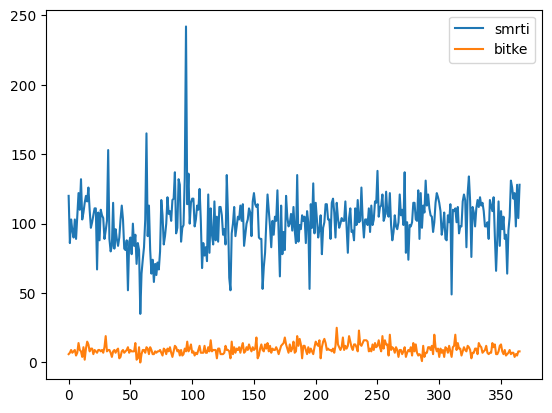

In [111]:
zbrani_podatki = pd.DataFrame({
   'smrti': ST_PODATKOV["Št smrti"],
   'bitke': ST_PODATKOV["Št bitk ali vojen"],
   }) #index=ST_PODATKOV["Datum"])
lines = zbrani_podatki.plot.line()

Lahko opazimo nekaj ujemanj, med naraščanjem ali padanjem obeh grafov.
Zdi se da beležene bitke vplivajo na smrti zabeleženih oseb, a le v manjši količini.

## Kako širok je razpon podatkov?

In [114]:
filter = OSEBE["Rojstvo"].notna()
OSEBE[filter].sort_values(by ="Rojstvo", ascending=True)

,Datum,Ime,Naziv,Rojstvo,Smrt,Življenska doba
31413,9.April,Jimmu,emperor of Japan,-711.0,-585.0,126
109103,4.December,Cyrus the Great,king of Persia,-600.0,-530.0,70
85577,28.September,Confucius,"Chinese teacher, editor, politician, and philo...",-551.0,NaN,404
90387,12.Oktober,Demosthenes,"Athenian statesman,",-384.0,-322.0,62
89023,8.Oktober,Pyrrhus of Epirus,NaN,-319.0,-272.0,47
...,...,...,...,...,...,...
18613,2.Marc,"Prince Oscar, Duke of Skåne",NaN,2016.0,NaN,404
11507,5.Februar,Jigme Namgyel Wangchuck,Bhutanese prince,2016.0,NaN,404
35942,23.April,Prince Louis of Wales,NaN,2018.0,NaN,404
39504,6.Maj,Prince Archie of Sussex,NaN,2019.0,NaN,404


V Wikipediji najzgodnjejše zabeleženo rojstvo je bilo 711 let pred našim štetjem, najkasnejše pa 3 leta nazaj z rojstvom princese Lilibet.

In [115]:
filter = OSEBE["Smrt"].notna()
OSEBE[filter].sort_values(by ="Smrt", ascending=True)

,Datum,Ime,Naziv,Rojstvo,Smrt,Življenska doba
38243,2.Maj,Merneptah,pharaoh,NaN,-1203.0,404
71252,19.August,Duke Ling of Jin,Chinese monarch,NaN,-607.0,404
31413,9.April,Jimmu,emperor of Japan,-711.0,-585.0,126
109103,4.December,Cyrus the Great,king of Persia,-600.0,-530.0,70
57347,6.Julij,Cleombrotus I,Spartan king,NaN,-371.0,404
...,...,...,...,...,...,...
39850,8.Maj,Jimmy Johnson,American football player,1938.0,2024.0,86
39849,8.Maj,Chris Cannon,American politician,1950.0,2024.0,74
46514,31.Maj,Robert Pickton,Canadian serial killer,1949.0,2024.0,75
65270,31.Julij,Lynne Reid Banks,English author,1929.0,2024.0,95


Pri zabeleženi smrti pa to trenutno znaša od 1203 let pred našim štetjem, pa vse do letošnjega leta.

### Je naša informiranost skozi leta naraščala?

<Axes: >

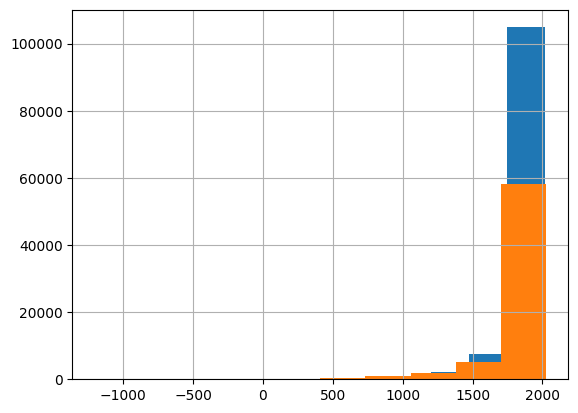

In [118]:
OSEBE["Rojstvo"].hist()
OSEBE["Smrt"].hist()

Tako pri rojstvu, kot smrti lahko opazimo, da število zabeleženih podatkov hitro narašča.

### Ali je podaljšana življenska doba očitna? 

trenutno prikazuje samo samo kako dolgo so ljudje živeli, loči po rojstvih!!!!!!!!!!!!  + POIMENUJ OSI

<Axes: xlabel='Življenska doba'>

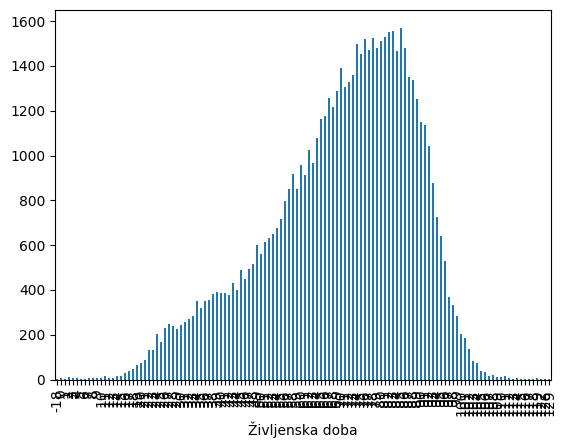

In [133]:
filter = OSEBE["Življenska doba"] != 404
podana_zivljenska_doba = OSEBE[filter]
#podana_zivljenska_doba.sort_values(by ="Življenska doba", ascending=True)
zivljenska_d = podana_zd.groupby(by="Življenska doba").size()
zivljenska_d.plot.bar()

## Katere dni je bilo največ bitk?

In [137]:
ST_PODATKOV.sort_values(by ="Št bitk ali vojen", ascending=True)

,Datum,Št dogodkov,Št bitk ali vojen,Št rojstev,Št smrti
58,28.Februar,26,0,158,35
286,13.Oktober,40,1,205,97
55,25.Februar,30,2,146,71
13,14.Januar,30,2,252,115
131,11.Maj,34,3,102,52
...,...,...,...,...,...
260,17.September,66,20,271,122
296,23.Oktober,58,20,269,101
313,9.November,70,20,211,111
235,23.August,68,23,243,101


## Zaključek

Podatkov je veliko, vendar niso vsi pravilni... še posebej na Wikipediji.
print(min(zivljenka doba)) :)
